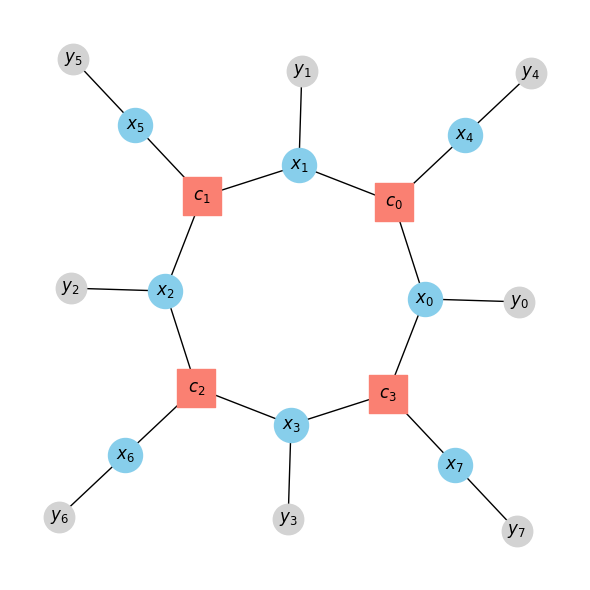

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from decoders import LinearCode, VarNodeCloner, decode_bpqm, decode_single_codeword

# 1. Define the [8,4] code (Section 6)
G = np.array([
    [1, 0, 0, 0, 1, 0, 0, 1],
    [0, 1, 0, 0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 1, 1],
])
H = np.array([
    [1, 1, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0, 0, 1, 0],
    [1, 0, 0, 1, 0, 0, 0, 1],
])

code = LinearCode(G, H)

code.plot_factor_graph(backend="matplotlib")


In [ ]:
code.plot_factor_graph(
    backend="pyvis",
    variable_size=300,
    output_size=300,
    output_color="gray",
    label_font_size=20,
    width="900px",
    height="900px",
    html_file="factor_graph.html"
)


factor_graph.html


AttributeError: 'NoneType' object has no attribute 'render'

In [ ]:
# 3. BPQM decoding
theta = 0.2 * np.pi
cloner = VarNodeCloner(theta)

# 3a. Single‐bit decode (bit index 4)
p_bit = decode_bpqm(
    code,
    theta,
    cloner=cloner,
    height=2,
    mode='bit',
    bit=4,
    only_zero_codeword=True,
    debug=False
)
print("Success probability for bit 4:", p_bit)

# 3b. Full‐codeword decode (bits [0,1,2,3])
p_codeword = decode_bpqm(
    code,
    theta,
    cloner=cloner,
    height=2,
    mode='codeword',
    order=[0, 1, 2, 3],
    only_zero_codeword=True,
    debug=False
)
print("Success probability for the full codeword:", p_codeword)


AttributeError: 'LinearCode' object has no attribute 'get_computation_graph'

In [ ]:
# Decode a specific codeword and obtain the measurement outcome
code = LinearCode(None, H)
message = np.array([0, 1, 0, 1])
codeword = message @ G % 2
corrupted_codeword = codeword.copy()
corrupted_codeword[0] = 1 if corrupted_codeword[0] == 0 else 0

decoded = decode_single_codeword(
    code,
    theta,
    cloner=cloner,
    height=2,
    codeword=corrupted_codeword,
)
print("Codeword          : ", codeword)
print("Corruped codeword : ", corrupted_codeword)
print("Decoded bits      : ", decoded)

Codeword          :  [0 1 0 1 1 1 1 1]
Corruped codeword :  [1 1 0 1 1 1 1 1]
Decoded bits      :  [0 1 0 1 1 1 1 1]
